In [184]:
import numpy as np
import matplotlib.pyplot as plt
from shapely import geometry
import cv2
%matplotlib inline

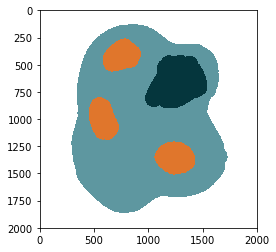

In [130]:
file = './blob1.jpg'
img = cv2.imread(file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [131]:
# Find the unique colors:
colors, counts = np.unique(img.reshape(-1, img.shape[2]), axis=0, return_counts=True)
print(len(colors), 'unique RGB colors')

339 unique RGB colors


In [132]:
# Use only largest color areas
print(len([x for x in counts if x > 10000]), 'common colors')
to_use = [tuple(c) for i, c in enumerate(colors) if counts[i] > 10000]
to_use = [x for x in to_use if x != (255, 255, 255)] # remove white
print(to_use)

4 common colors
[(5, 54, 61), (94, 151, 160), (224, 118, 44)]


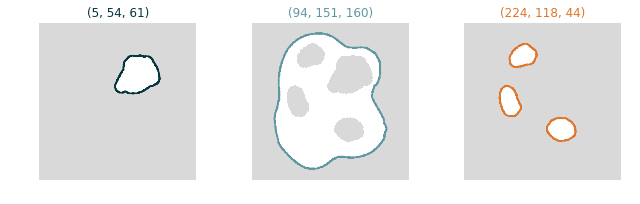

In [223]:
# Create contours for each color

fig = plt.figure(figsize=(9, 3))
for i, color in enumerate(to_use):
    rgbcolor = tuple([x/255 for x in color])
    
    lower = np.array(color)
    upper = np.array(color)
    mask = cv2.inRange(img, lower, upper)
    _, contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    ax = fig.add_subplot(1, 3, i+1)
    for con in contours: 
        c = [tuple(c[0]) for c in con]
        xs, ys = [x[0] for x in c], [x[1] for x in c]
        ax.plot(xs, ys, clip_on=False, color=rgbcolor)
    ax.imshow(mask, alpha=0.15, cmap='gray')
    ax.set_title(color, color=rgbcolor)
    ax.axis('off')
                
plt.tight_layout()
plt.show()

In [246]:
# Create a Shapely Polygon for color 1

color = to_use[0]
lower = np.array(color)
upper = np.array(color)
mask = cv2.inRange(img, lower, upper)
_, contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours), 'separate contour vectors detected')

pointList = []
for con in contours: 
    pointList += [tuple(c[0]) for c in con]

pointList = [geometry.Point(x) for x in pointList]
pointList.append(cs[0])
navy_poly = geometry.Polygon(([[p.x, p.y] for p in pointList]))

print("Area of polygon is:", navy_poly.area)
print("Centroid of polygon is:", navy_poly.centroid)

171 separate contour vectors detected
Area of polygon is: 227958.0
Centroid of polygon is: POINT (1285.551495597142 671.6653352810605)


In [247]:
# Create a Shapely Polygon for color 2

color = to_use[1]
lower = np.array(color)
upper = np.array(color)
mask = cv2.inRange(img, lower, upper)
_, contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours), 'separate contour vectors detected')

pointList = []
for con in contours: 
    pointList += [tuple(c[0]) for c in con]

pointList = [geometry.Point(x) for x in pointList]
pointList.append(cs[0])
blue_poly = geometry.Polygon(([[p.x, p.y] for p in pointList]))

print("Area of polygon is:", blue_poly.area)
print("Centroid of polygon is:", blue_poly.centroid)

992 separate contour vectors detected
Area of polygon is: 1977233.5
Centroid of polygon is: POINT (1069.933347528251 1014.395505386693)


2 closest points


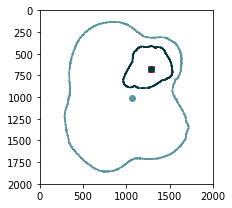

In [285]:
# Plot centroids of each shape

from shapely.ops import nearest_points
nearest_geoms = nearest_points(blue_poly, geometry.Point(navy_poly.centroid.coords))
print(len(nearest_geoms), 'closest points')

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)

for i in nearest_geoms:
    coord = i.coords
    ax.scatter(coord[0][0], coord[0][1], marker='x', color='red')

for color, poly in zip([to_use[0], to_use[1]], [navy_poly, blue_poly]):
    rgbcolor = tuple([x/255 for x in color]) 
    coord = list(poly.centroid.coords)
    ax.scatter(coord[0][0], coord[0][1], color=rgbcolor) 
    lower = np.array(color)
    upper = np.array(color)
    mask = cv2.inRange(img, lower, upper)
    _, contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for con in contours: 
        c = [tuple(c[0]) for c in con]
        xs, ys = [x[0] for x in c], [x[1] for x in c]
        ax.plot(xs, ys, clip_on=False, color=rgbcolor)
    ax.imshow(mask, alpha=0, cmap='gray')
    
plt.tight_layout()
plt.show()